* Agregar lineas horizontales y verticales con promedios
* normalizar el tamaño para variables raras como PBI per capita
* viajes a pie vs viajes a pie y en bici para diferencia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

In [2]:
nombresCortos = [u'area', u'poblacion', u'densidad_urbana', u'PIB',
       u'salario_minimo', u'sistema_vial', u'inters_semaforicas',
       u'carrilExc_acera',
       u'carrilExc_centro',
       u'carrilExc_BRT',
       u'carrilExc_prop', u'ciclocarriles',
       u'ciclovias', u'otras_prioridad',
       u'ciclistas_prop',
       u'flota_taxisColetivos', u'flota_jeeps', u'flota_combiVans', u'flota_microbus',
       u'flota_bus', u'flota_busArticulado', u'flota_busBiarticulado', u'flota_tren', u'flota_metro',
       u'flota_tranvia', u'flota_barcos', u'claseOrganizacion', u'instrumentoLegal',
       u'tarifaOmnibus', u'tarifaMicrobus',
       u'tarifaTren', u'tarifaMetro',
       u'tarifaTranvia', u'rrhhNeumaticos',
       u'rrhhFerrocarriles', u'asientos', u'asientos_milhab',
       u'flota_automovil', u'flota_motocicleta', u'flota_taxi',
       u'autos_milhab', u'motos_milhab',
       u'viajes_individual',
       u'viajes_colectivo',
       u'viajes_pie',u'viajes_total',
       u'viajesHab_individual', u'viajesHab_colectivo',
       u'viajesHab_pie-bici', u'viajesHab_total',
       u'opEsp_viasExcluTCpico',
       u'viajesHab_viasRevTCpico',
       u'viajesHab_viasRevAutopico',
       u'viajesHab_cicloviasFinde',
       u'viajesHab_PicoPlaca', u'energiaXhabXdia',
       u'victimas_fatales', u'victimas_por100mil', u'costo_automovil',
       u'costo_motocicleta', u'costo_mutobus', u'costo_auto-bus', u'costo_moto-bus',
       u'subsidios', u'recaudacion',
       u'subs-rec', u'patrimonio_auto',
       u'patrimonio_moto',
       u'patrimonio_vehi-ublico',
       u'patrimonio_vias',
       u'patrimonio_prioridadTC',
       u'patrimonio_rieles',
       u'patrimonio_total',
       u'patrimonio_porHab',
       u'latitude', u'longitude']

In [39]:
def redondear(x):
    try:
        return round(x,1)
    except:
        return np.nan
    
def porcentuar(x):
    return redondear(x * 100)

def ploteo(ejeX, ejeY, dataset, labelX, labelY,color = False, tamanio = False,):
        
    if tamanio:
        s = dataset[tamanio]
    else:
        s = [30] * dataset.shape[0]

    

    
    plt.figure(figsize=(12,6))
    if color:
        #si es numerico convertir en 5Q 
        if np.issubdtype(dataset[color].dtype, np.number):
            etiquetas = map(lambda x: 'Q'+str(x),range(1,6))
            c = pd.qcut(dataset[color],5,labels=range(1,6))
            cmap = cm.get_cmap("coolwarm",5)
            vmin = 0.5
            vmax = 5.5
            ticksBarra = range(1,6)
        #si es texto categorizar
        else:
            
            dataCategorizada = dataset[color].astype('category')
            
            etiquetas = dataCategorizada.cat.categories.unique()
            c = dataCategorizada.cat.codes
            cmap = cm.get_cmap("Set3",len(dataCategorizada.cat.categories))
            vmin = dataCategorizada.cat.codes.min()-0.5
            vmax = dataCategorizada.cat.codes.max()+0.5
            ticksBarra = dataCategorizada.cat.codes.unique()
        plt.scatter(dataset[ejeX], dataset[ejeY],
                    c=c,
                    label=etiquetas,
                    s = s,
                    cmap=cmap,
                    vmin=vmin,vmax=vmax)
        
        barra = plt.colorbar(ticks=ticksBarra)
        barra.ax.set_yticklabels(etiquetas) 
        
        
        
        
    else:
        plt.scatter(dataset[ejeX], dataset[ejeY],
                    c='grey',
                    s = s)
        
    plt.axvline(x=dataset[ejeX].mean(),c='black',ls='dashed')
    plt.axhline(y=dataset[ejeY].mean(),c='black',ls='dashed')
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
   
    for i, txt in enumerate(dataset.index):
        plt.annotate(txt, (dataset[ejeX][i],dataset[ejeY][i]))

In [5]:
data = pd.read_csv('ciudades2015.csv',index_col=0)
data.columns = nombresCortos

#llenar instrumento legal con los que son publicos
data['instrumentoLegal'] = data['instrumentoLegal'].fillna('Sistema Publico')

data['PBIperCapita'] = data.PIB / data.poblacion * 1000000000

#cambiar a numerico
data['victimas_fatales'] = pd.to_numeric(data['victimas_fatales'],errors='coerce')
data['victimas_por100mil'] = pd.to_numeric(data['victimas_por100mil'],errors='coerce')

data['densidad_urbana'] = data['densidad_urbana'].map(int)
data['sistema_vial'] = data['sistema_vial'].map(int)
data.flota_taxi = data.flota_taxi.map(int)

data['PIB'] = data['PIB'].map(redondear)
data['salario_minimo'] = data['salario_minimo'].map(redondear)
data['carrilExc_prop'] = data['carrilExc_prop'].map(redondear)
data['ciclistas_prop'] = data['ciclistas_prop'].map(redondear)
data['asientos_milhab'] = data['asientos_milhab'].map(redondear)
data.autos_milhab = data.autos_milhab.map(redondear) 
data.motos_milhab = data.motos_milhab.map(redondear)


#Flota Publica total
data['flota_publica_total'] = data.loc[:,[u'flota_taxisColetivos', u'flota_jeeps', u'flota_combiVans', u'flota_microbus',
                                 u'flota_bus', u'flota_busArticulado', u'flota_busBiarticulado',
                                 u'flota_tren', u'flota_metro',u'flota_tranvia', 
                                 u'flota_barcos']].sum(axis=1)
                              
#flota compartida
data['compartida'] = data.loc[:,[u'flota_taxisColetivos', u'flota_jeeps',
                                 u'flota_combiVans', u'flota_microbus']].sum(axis=1)

data['compartida_prop'] = data['compartida']*1. / data['flota_publica_total']
data['compartida_prop'] = data['compartida_prop'].map(porcentuar)

#flota de buses
data['bus'] = data.loc[:,[u'flota_bus', u'flota_busArticulado', u'flota_busBiarticulado']].sum(axis=1)
data['bus_prop'] = data['bus']*1. / data['flota_publica_total']
data['bus_prop'] = data['bus_prop'].map(porcentuar)

#flota ferroviaria
data['ferroviaria'] = data.loc[:,[u'flota_tren', u'flota_metro',u'flota_tranvia']].sum(axis=1)
data['ferroviaria_prop'] = data['ferroviaria']*1. / data['flota_publica_total']
data['ferroviaria_prop'] = data['ferroviaria_prop'].map(porcentuar)

data['flotaPublicaPorMil'] = data.flota_publica_total / data.poblacion * 1000
data['flotaCompartidaPorMil'] = data.compartida / data.poblacion * 1000
data['flotaBusPorMil'] = data.bus / data.poblacion * 1000
data['flotaFerroviariaPorMil'] = data.ferroviaria / data.poblacion * 1000


#FLOTA PRIVADA
#taxis por mil habitantes
data['taxis_milhab'] = data.flota_taxi / data.poblacion * 1000
data.taxis_milhab = data.taxis_milhab.map(redondear)

#flota privada por mil
data['flotaPrivadaPorMil'] = data.loc[:,['taxis_milhab','autos_milhab','motos_milhab']].sum(axis=1)
data['taxiPropPrivado'] = data['taxis_milhab'] / data['flotaPrivadaPorMil'] 

data.flotaPrivadaPorMil = data.flotaPrivadaPorMil.map(redondear)
data.taxiPropPrivado = data.taxiPropPrivado.map(porcentuar)


#Flota total por mil habitantes
data['flotaTotalPorMil'] = data['flotaPublicaPorMil']  + data['flotaPrivadaPorMil']


#cantidad de vehiculos privados por cada vechiculo publico
data['privadaVpublico'] = data['flotaPrivadaPorMil'] / data['flotaPublicaPorMil']   
data['privadaVpublico'] = data['privadaVpublico'].map(redondear)

#porcentaje de vehiculos (cada mil habitantes) que son compartido y taxi
data['compartidoYtaxi'] = (data.flotaCompartidaPorMil + data.taxis_milhab) / data.flotaTotalPorMil
data['compartidoYtaxi'] = data['compartidoYtaxi'].map(porcentuar)

#porcentaje de vehiculos compartidos dentro de los compartido y taxi
data['compSobreTaxi'] = data.flotaCompartidaPorMil / (data.flotaCompartidaPorMil + data.taxis_milhab)
data['compSobreTaxi'] = data['compSobreTaxi'].map(porcentuar)

#TARIFAS


#tarifa ponderada

#ambas en relacion al salario minimo



data.head()

,area,poblacion,densidad_urbana,PIB,salario_minimo,sistema_vial,inters_semaforicas,carrilExc_acera,carrilExc_centro,carrilExc_BRT,...,flotaCompartidaPorMil,flotaBusPorMil,flotaFerroviariaPorMil,taxis_milhab,flotaPrivadaPorMil,taxiPropPrivado,flotaTotalPorMil,privadaVpublico,compartidoYtaxi,compSobreTaxi
Caracas,260.630,3611087,13855,NaN,NaN,2696,547,NaN,NaN,5.2,...,4.536861,0.381603,0.185817,3.8,438.4,0.9,443.504280,85.9,1.9,54.4
Panama,287.000,1771384,6172,46.2,496.0,2050,180,3.5,NaN,NaN,...,0.989622,0.697759,0.033872,25.1,268.1,9.4,269.821253,155.8,9.7,3.8
Rio de Janeiro,900.000,12156624,13507,153.4,272.6,15371,3169,45.0,NaN,91.0,...,0.125522,1.269273,0.078887,3.0,230.4,1.3,231.875656,156.1,1.3,4.0
Guadalajara,692.524,4515531,6520,73.8,226.0,10439,1823,NaN,NaN,16.1,...,0.000000,1.171069,0.010630,2.8,440.0,0.6,441.181699,372.3,0.6,0.0
Cali,151.365,2784664,18397,14.0,257.5,2341,466,NaN,NaN,36.3,...,0.109857,0.378587,0.000000,7.1,232.2,3.1,232.688445,475.4,3.1,1.5


In [31]:
tarifas = [u'tarifaOmnibus', u'tarifaMicrobus',
       u'tarifaTren', u'tarifaMetro',
       u'tarifaTranvia']

tarifa = data.loc[:,tarifas]

#tarifa promedio simple
tarifa['tarifaPromedioSimple'] = tarifa.loc[:,tarifas].mean(axis=1)
tarifa['tarifaPromedioSimpleSal'] = tarifa['tarifaPromedioSimple'] / data.salario_minimo *100


    
denominador = data.loc[:,[u'flota_taxisColetivos', u'flota_jeeps', u'flota_combiVans', u'flota_microbus',
                                 u'flota_bus', u'flota_busArticulado', u'flota_busBiarticulado',
                                 u'flota_tren', u'flota_metro',u'flota_tranvia']].sum(axis=1)
flotaBuses = data.loc[:,[u'flota_bus', u'flota_busArticulado', u'flota_busBiarticulado']].sum(axis=1)

flotaMicrobus = data.loc[:,['flota_taxisColetivos', u'flota_jeeps', u'flota_combiVans', u'flota_microbus']].sum(axis=1)


#pesos
pesoOmnibus = flotaBuses / denominador
pesoMicrobus = flotaMicrobus / denominador
pesoTren = (data.flota_tren / denominador).fillna(0)
pesoMetro = (data.flota_metro / denominador).fillna(0)
pesoTranvia = (data.flota_tranvia / denominador).fillna(0)

pesos = {'pesoOmnibus' : flotaBuses / denominador,
         'pesoMicrobus' : flotaMicrobus / denominador,
         'pesoTren' : (data.flota_tren / denominador).fillna(0),
         'pesoMetro' : (data.flota_metro / denominador).fillna(0),
         'pesoTranvia' : (data.flota_tranvia / denominador).fillna(0)
        }


for modo in tarifas:
    tarifa[modo + 'Salario'] = tarifa[modo] / data.salario_minimo

tarifa['tarifaPromedioPonderado'] = tarifa.tarifaOmnibus.fillna(0) * pesos['pesoOmnibus'] + \
                              tarifa.tarifaMicrobus.fillna(0) * pesos['pesoMicrobus']+ \
                              tarifa.tarifaTren.fillna(0) * pesos['pesoTren'] + \
                              tarifa.tarifaMetro.fillna(0) * pesos['pesoMetro'] + \
                              tarifa.tarifaTranvia.fillna(0) * pesos['pesoTranvia'] 
                
tarifa['tarifaPromedioPonderadoSal'] = tarifa['tarifaPromedioPonderado'] / data.salario_minimo *100

data['tarifaPromedioPonderado'] = tarifa['tarifaPromedioPonderado']
data['tarifaPromedioPonderadoSal'] =tarifa['tarifaPromedioPonderadoSal']
data['tarifaPromedioSimple'] = tarifa['tarifaPromedioSimple'] 
data['tarifaPromedioSimpleSal'] = tarifa['tarifaPromedioSimpleSal']

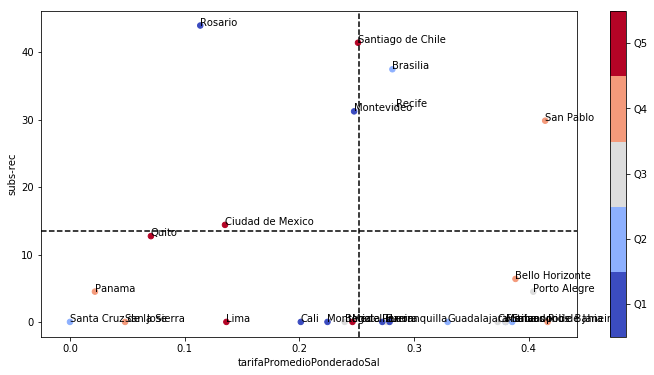

In [59]:
ploteo(ejeX = 'tarifaPromedioPonderadoSal',
       ejeY = 'subs-rec',
       color = 'asientos_milhab',
       #tamanio = 'PBIperCapita',
       dataset = data.drop('Buenos Aires'),
       labelX = 'tarifaPromedioPonderadoSal',
       labelY = u'subs-rec')

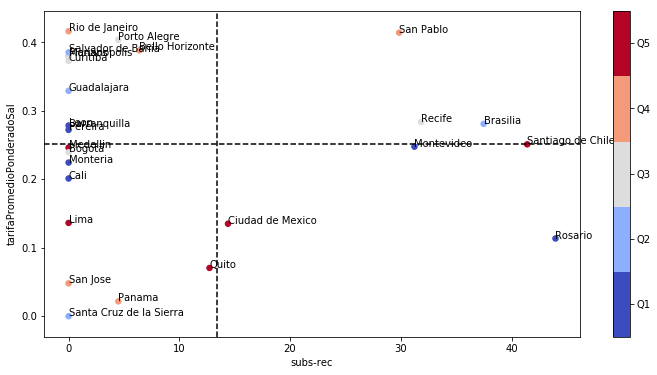

In [58]:
ploteo(ejeX = 'subs-rec',
       ejeY = 'tarifaPromedioPonderadoSal',
       color = 'asientos_milhab',
       #tamanio = 'PBIperCapita',
       dataset = data.drop('Buenos Aires'),
       labelX = u'subs-rec',
       labelY = 'tarifaPromedioPonderadoSal')

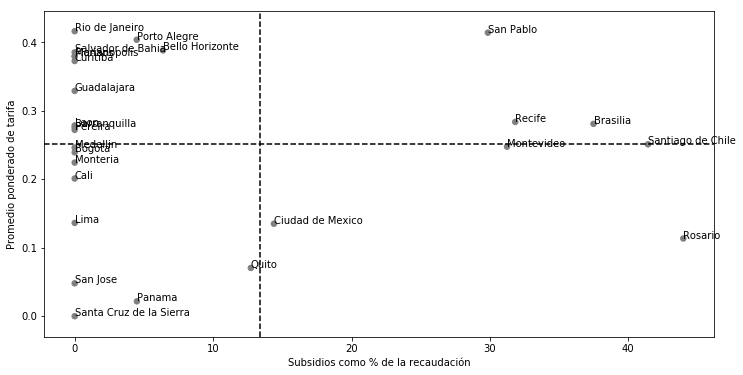

In [57]:
ploteo(ejeX = 'subs-rec',
       ejeY = 'tarifaPromedioPonderadoSal',
       #color = 'asientos_milhab',
       #tamanio = 'PBIperCapita',
       dataset = data.drop(['Buenos Aires']),
       labelX = u'Subsidios como % de la recaudación',
       labelY = 'Promedio ponderado de tarifa')

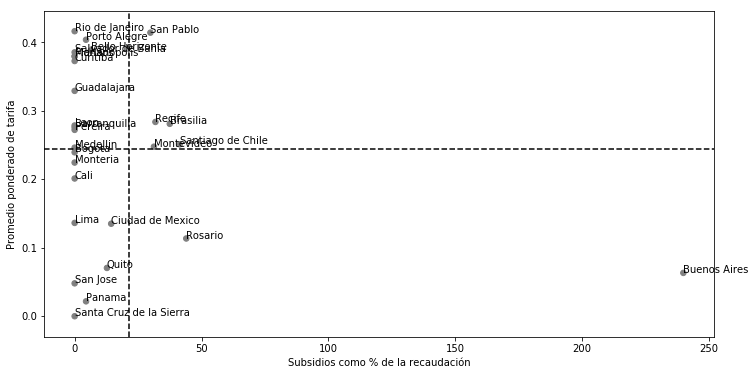

In [56]:
ploteo(ejeX = 'subs-rec',
       ejeY = 'tarifaPromedioPonderadoSal',
       #color = 'asientos_milhab',
       #tamanio = 'PBIperCapita',
       dataset = data,
       labelX = u'Subsidios como % de la recaudación',
       labelY = 'Promedio ponderado de tarifa')

In [43]:
data['sub-PBI'] =  data.subsidios / data.PIB

In [47]:
data.asientos_milhab

Caracas                    167.0
Panama                     113.2
Rio de Janeiro             126.4
Guadalajara                 80.2
Cali                        54.7
Porto Alegre               107.0
Curitiba                    87.2
Montevideo                  68.2
Manaos                      85.4
Quito                      126.6
Buenos Aires               100.8
Santiago de Chile          214.0
Rosario                     38.2
Barranquilla                86.1
Ciudad de Mexico           175.9
Medellin                   129.2
Brasilia                    75.4
San Jose                   111.5
Bello Horizonte            114.4
Recife                      97.7
Pereira                     57.0
Monteria                    39.7
Florianopolis               93.3
San Pablo                  121.2
Bogota                      86.1
Leon                        74.0
Santa Cruz de la Sierra     84.9
Salvador de Bahia           80.6
Lima                       192.0
Name: asientos_milhab, dtype: float64

In [49]:
#GUARDAR

#socioeconomico
socioeconomico = data.loc[:,[u'area', u'poblacion', u'densidad_urbana', u'PIB',
       u'salario_minimo',u'latitude', u'longitude']]
socioeconomico.to_csv('socioeconomico.csv')

#infraestructura
infraestructura = data.loc[:,[u'sistema_vial', u'inters_semaforicas',
       u'carrilExc_acera',
       u'carrilExc_centro',
       u'carrilExc_BRT',
       u'carrilExc_prop', u'ciclocarriles',
       u'ciclovias', u'otras_prioridad',
       u'ciclistas_prop',u'latitude', u'longitude']]

infraestructura.to_csv('infraestructura.csv')


#flotaPublica
flotaPublica = data.loc[:,[u'flota_taxisColetivos', u'flota_jeeps', u'flota_combiVans', u'flota_microbus',
       u'flota_bus', u'flota_busArticulado', u'flota_busBiarticulado',
                           u'flota_tren', u'flota_metro',u'flota_tranvia', 
                           u'flota_barcos',u'latitude', u'longitude',u'asientos_milhab',
                           'flota_total','compartida','compartida_prop','bus','bus_prop',
                          'ferroviaria','ferroviaria_prop']]



flotaPublica.to_csv('flotaPublica.csv')

#flotaPrivada
flotaPrivada = data.loc[:,['poblacion',u'flota_taxi',
                           u'autos_milhab', u'motos_milhab',u'latitude', u'longitude',
                          'taxis_milhab','flotaPrivadaPorMil','taxiPropPrivado']]

flotaPrivada['taxis_milhab'] = flotaPrivada.flota_taxi / flotaPrivada.poblacion * 1000
flotaPrivada['flotaPrivadaPorMil'] = flotaPrivada.loc[:,['taxis_milhab','autos_milhab','motos_milhab']].sum(axis=1)
flotaPrivada['taxiPropPrivado'] = flotaPrivada['taxis_milhab'] / flotaPrivada['flotaPrivadaPorMil'] 
flotaPrivada.to_csv('flotaPrivada.csv')

#comapracion privada publico
privadaVpublico = data.loc[:,['latitude','longitude',
                              'compartidoYtaxi','compSobreTaxi',
                              'privadaVpublico','asientos_milhab']]




privadaVpublico.to_csv('privadaVpublico.csv')
